# Practice Spacy

Avant d'aller plus loin dans le Deep Learning notamment textuel, regardons Spacy avec du scrapping

*Voici le code à reproduire pour scrapper des données. Cela peut se faire sur n'importe quel site :

```
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Buzz_Aldrin")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = [ ]
for p in soup.find_all("p"):
  corpus.append(p.text)
```

In [1]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Buzz_Aldrin")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')
 
corpus = []
for p in soup.find_all("p"):
  corpus.append(p.text)

* If the code worked well, you should have the following ouput

In [2]:
corpus

['\n\t\tPages pour les éditeurs déconnectés en savoir plus\n',
 'Vous lisez un «\xa0bon article\xa0».\n',
 'Pour les articles homonymes, voir Aldrin.\n',
 'Ne doit pas être confondu avec Edwin Eugene Aldrin Sr..\n',
 '\n',
 "Buzz Aldrin, né Edwin Eugene Aldrin Jr., le 20 janvier 1930 à Glen Ridge dans le New Jersey aux États-Unis, est un militaire, pilote d'essai, astronaute et ingénieur américain. Il effectue trois sorties dans l'espace en tant que pilote de la mission Gemini 12 de 1966 et, en tant que pilote du module lunaire Apollo de la mission Apollo 11 de 1969, il est, avec le commandant de la mission Neil Armstrong, l'un des deux premiers humains à marcher sur la Lune.\n",
 "Aldrin est issu de la promotion 1951 de l'Académie militaire de West Point avec un diplôme en génie mécanique. Il est affecté à l'armée de l'air américaine et devient pilote de chasseur à réaction pendant la guerre de Corée. Il effectue au total 66\xa0missions de combat et abat deux MiG-15. Après avoir obten

* Installer les modules de `spacy` correspondant aux spécificités du langage (nous utilserons le français pour ce TP). Donc installer `en_core_news_sm`. 
  * La documentation : [English](https://spacy.io/models/fr)

In [3]:
import spacy
import fr_core_news_sm

* Importez maintenant `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

* Maintenant créons un corpus de text dans une variable. C'est une bonne pratique d'utilisation de Spacy. Vous allez donc devoir créer un corpus de text "propre", pour cela utilisons les fonctions suivantes : : 
  * join()
  * strip() 

In [5]:
stripped_corpus = [text.strip() for text in corpus]
join_corpus = " ".join(stripped_corpus)
clean_corpus = join_corpus.strip().encode("utf-8").decode("utf-8")
clean_corpus

"Pages pour les éditeurs déconnectés en savoir plus Vous lisez un «\xa0bon article\xa0». Pour les articles homonymes, voir Aldrin. Ne doit pas être confondu avec Edwin Eugene Aldrin Sr..  Buzz Aldrin, né Edwin Eugene Aldrin Jr., le 20 janvier 1930 à Glen Ridge dans le New Jersey aux États-Unis, est un militaire, pilote d'essai, astronaute et ingénieur américain. Il effectue trois sorties dans l'espace en tant que pilote de la mission Gemini 12 de 1966 et, en tant que pilote du module lunaire Apollo de la mission Apollo 11 de 1969, il est, avec le commandant de la mission Neil Armstrong, l'un des deux premiers humains à marcher sur la Lune. Aldrin est issu de la promotion 1951 de l'Académie militaire de West Point avec un diplôme en génie mécanique. Il est affecté à l'armée de l'air américaine et devient pilote de chasseur à réaction pendant la guerre de Corée. Il effectue au total 66\xa0missions de combat et abat deux MiG-15. Après avoir obtenu un doctorat en astronautique du Massachus

* Maintenant ajoutez votre corpus complet dans spacy avec la ligne de commande `fr_core_news_sm.load()`.

In [20]:
nlp = fr_core_news_sm.load()

* Avec une visualisation de type worcloud et la librairie `wordcloud`, créez un premier nuage de mot : 

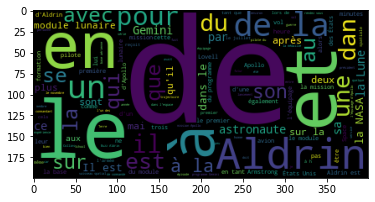

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wd = WordCloud()
cloud = wd.generate(clean_corpus)
plt.imshow(cloud)

In [22]:
# Import Stop words 
from spacy.lang.fr.stop_words import STOP_WORDS
STOP_WORDS

{'a',
 'abord',
 'afin',
 'ah',
 'ai',
 'aie',
 'ainsi',
 'ait',
 'allaient',
 'allons',
 'alors',
 'anterieur',
 'anterieure',
 'anterieures',
 'antérieur',
 'antérieure',
 'antérieures',
 'apres',
 'après',
 'as',
 'assez',
 'attendu',
 'au',
 'aupres',
 'auquel',
 'aura',
 'auraient',
 'aurait',
 'auront',
 'aussi',
 'autre',
 'autrement',
 'autres',
 'autrui',
 'aux',
 'auxquelles',
 'auxquels',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avoir',
 'avons',
 'ayant',
 'bas',
 'basee',
 'bat',
 "c'",
 'car',
 'ce',
 'ceci',
 'cela',
 'celle',
 'celle-ci',
 'celle-la',
 'celle-là',
 'celles',
 'celles-ci',
 'celles-la',
 'celles-là',
 'celui',
 'celui-ci',
 'celui-la',
 'celui-là',
 'cent',
 'cependant',
 'certain',
 'certaine',
 'certaines',
 'certains',
 'certes',
 'ces',
 'cet',
 'cette',
 'ceux',
 'ceux-ci',
 'ceux-là',
 'chacun',
 'chacune',
 'chaque',
 'chez',
 'ci',
 'cinq',
 'cinquantaine',
 'cinquante',
 'cinquantième',
 'cinquième',
 'combien',
 'comme',
 'comment',

* Faites un nouveau wordcloud sans les mots de liaisons (reprenez le code précédent et ajouter le paramètre stopwords dans la fonction wordcloud())

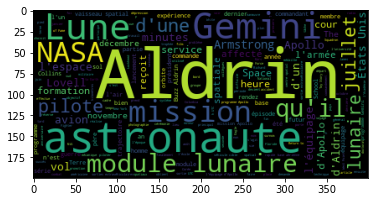

In [23]:
wd2 = WordCloud(stopwords=STOP_WORDS)
cloud2 = wd2.generate(clean_corpus)
plt.imshow(cloud2)

* Enfin, nous avons besoin d'avoir un corpus de mots lemmatisés, re-créez un corpus de mots lemmatisés et visualisez le nouveaux wordcloud.

In [24]:
lemma = [token.lemma_ for token in nlp(clean_corpus) if token.lemma_ not in STOP_WORDS]

In [25]:
corpus_lemma = " ".join(lemma)

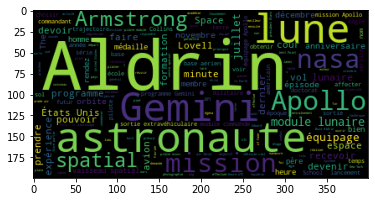

In [27]:
wd3 = WordCloud(stopwords=STOP_WORDS)
cloud3 = wd3.generate(corpus_lemma)
plt.imshow(cloud3)

* Que pouvez-vous conclure sur cette étude ?

Tout ça permet de récupérer les mots les plus répétés et donc importants d'un document

Le clean_corpus permet de préparer le texte en le formattant
Les stopwords permettent d'enlever les mots de liaison les plus courants de la langue francaise
Le lemma permet d'enlever tous les autres mots (qu'il, d'une, etc...)